# Taller: Introducción a Análisis de Componentes Principales (PCA) 

## 1. Introducción

El Análisis de Componentes Principales (PCA) es una técnica estadística de reducción de dimensionalidad que permite identificar patrones en datos de alta dimensión, al transformar las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales. Este taller tiene como objetivo introducir los fundamentos del PCA mediante un ejemplo práctico y simple, como preparación para el proyecto final del curso.

## 2. Objetivos

- Comprender el propósito del Análisis de Componentes Principales.
- Aplicar PCA sobre un conjunto de datos multivariado utilizando Python.
- Interpretar la varianza explicada por cada componente.
- Visualizar los datos proyectados en el nuevo espacio reducido.
- Entender cómo PCA puede mejorar modelos predictivos al reducir la multicolinealidad.


## 3. Dataset 

Este conjunto de datos proviene de un estudio longitudinal sobre salud cardiovascular realizado en la localidad de Framingham, Massachusetts. El objetivo principal es construir un modelo capaz de predecir si una persona desarrollará enfermedad coronaria en un periodo de 10 años. Incluye información de más de 4.000 pacientes, con un total de 15 variables, que abarcan factores de riesgo de tipo demográfico, conductual y médico. Para simplificar el análisis, se busca predecir si el individuo sobre o no hipertensión arterial (variable `prevalentHyp`), que es una variable categórica binaria (0 o 1).

### Categorías de Variables

1. Demográficas
	* Sex: género del paciente (masculino o femenino).
	* Age: edad en años, considerada como variable continua.

2. Conductuales
	* Current Smoker: indica si el paciente fuma actualmente.
	* Cigs Per Day: cantidad promedio de cigarrillos consumidos por día. Aunque es una variable discreta, se trata como continua.

3. Antecedentes Médicos
	* BP Meds: si está tomando medicamentos para la presión arterial.
	* Prevalent Stroke: si ha sufrido un accidente cerebrovascular en el pasado.
	* Prevalent Hyp: si presenta hipertensión.
	* Diabetes: si ha sido diagnosticado con diabetes.

4. Estado Médico Actual
	* Tot Chol: nivel total de colesterol.
	* Sys BP: presión arterial sistólica.
	* Dia BP: presión arterial diastólica.
	* BMI: índice de masa corporal.
	* Heart Rate: ritmo cardíaco.
	* Glucose: nivel de glucosa en sangre.

Este se encuentra disponible en Kaggle: [Framingham Heart Study Dataset](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

<div style="text-align:center;">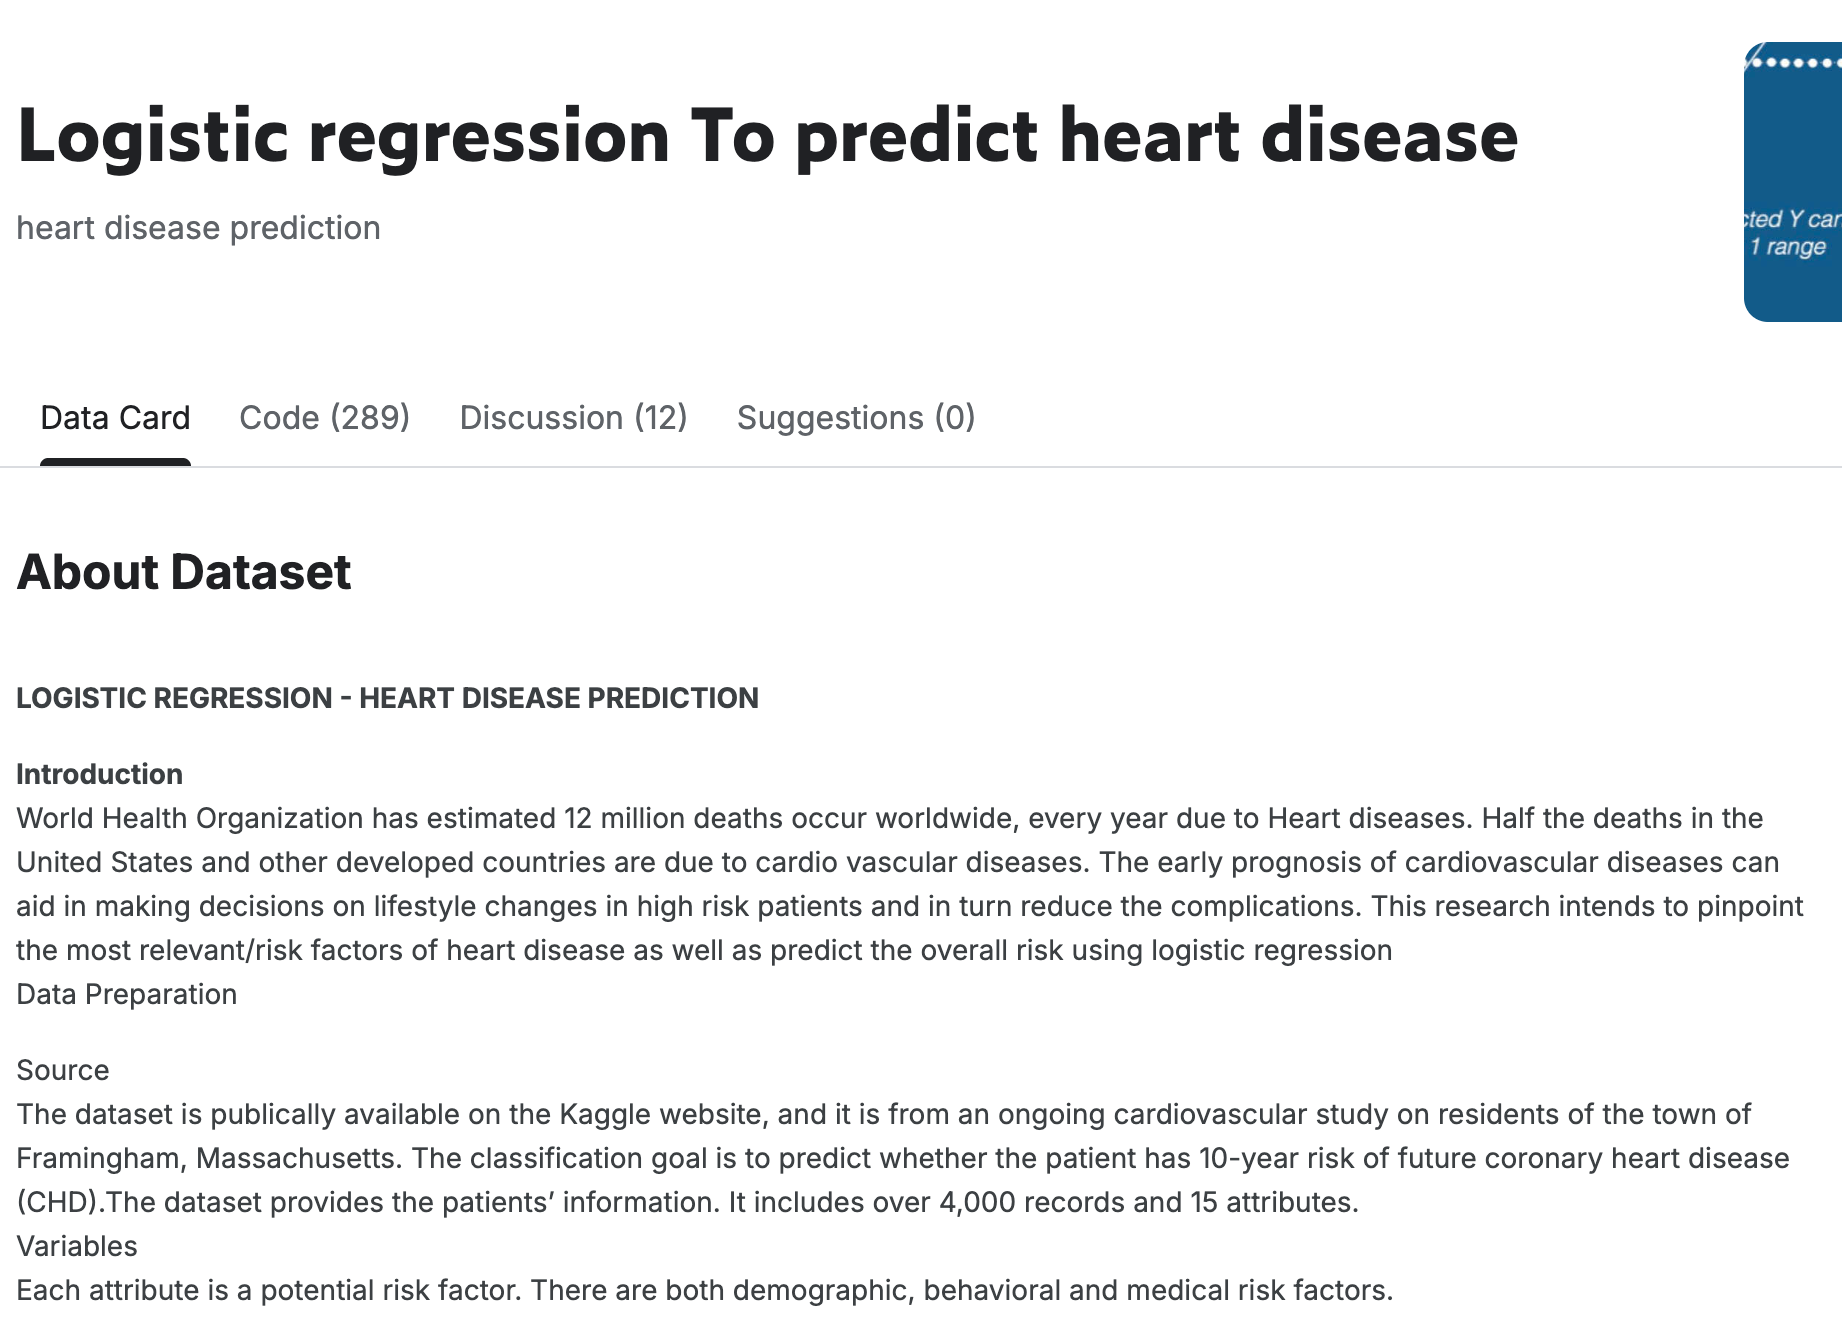</div>

### 3.1 Carga de datos

#### **Ejercicio 1** 

En base a los ejercicios anteriores, carga la base de datos e identifica la cantidad de filas y columnas que tiene. Importa toda las librerias necesarias para la resolución del ejercicio.



In [119]:
# <CODE> Importar librerias
import pandas as pd
import os
from matplotlib import pyplot as plt
import kagglehub

In [120]:
# <CODE> Descargar datos y cargar el dataset

path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, "framingham.csv"))



Path to dataset files: /Users/carlos/.cache/kagglehub/datasets/dileep070/heart-disease-prediction-using-logistic-regression/versions/1


In [121]:
# <CODE> Explorar el dataset
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("Tamaño del dataset:", df.shape)

Primeras filas del dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0     

#### **Ejercicio 2** 
PCA se encuentra diseñado para trabajar con datos numéricos continuos. Por lo tanto, es necesario transformar las variables categóricas en numéricas. Por otra parte, debido a que analiza la varianza de los datos, es importante que las variables estén normalizadas. Por lo tanto, es necesario normalizar los datos antes de aplicar PCA. 
1. Elimina las variables categóricas de la base de datos y genera un dataframe llamado `X` que contenga únicamente variables numéricas y otro dataframe llamado `y` que contenga la variable objetivo (`prevalentHyp`).
2. Normaliza los datos.
3. Realiza un plot de la matriz de correlación de los datos normalizados. HINT: Puedes utilizar la función `heatmap` de la librería `seaborn` para visualizar la matriz de correlación.

Responda:
1. ¿Qué variables tienen una correlación alta entre sí? ¿Qué variables tienen una correlación baja entre sí?




In [122]:
# <CODE> 1. Elimina las variables categóricas de la base de datos.
from sklearn.preprocessing import StandardScaler

df_clean = df.dropna()  # Eliminar filas con valores faltantes

# Separa variable objetivo
X = df_clean.drop(columns=['prevalentHyp'])
y = df_clean['prevalentHyp']


print(X.shape)



(3656, 15)


In [123]:
# <CODE> 2. Normaliza los datos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


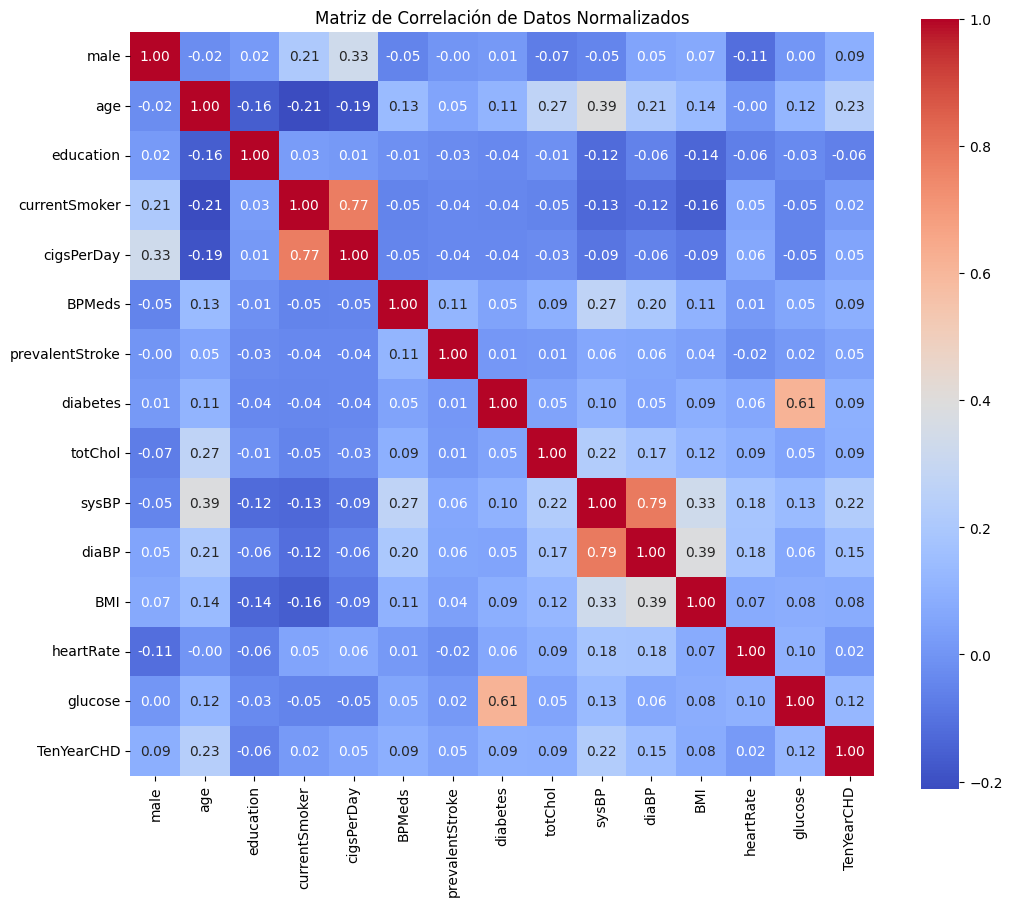

In [124]:
# <CODE> 3. Realiza un pair plot de la matriz de correlación de los datos normalizados.
import seaborn as sns
plt.figure(figsize=(12, 10))
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de Datos Normalizados')
plt.show()


#### **Ejercicio 3** 

Realiza un scatter plot de las variables `sysBP` y `diaBP` de la base de datos original. Utiliza la variable objetivo como color. 
Responda:
1. ¿Qué relación observas entre las variables `sysBP` y `diaBP`?
2. ¿Qué relación observas entre las variables `sysBP`, `diaBP` y la variable objetivo?
3. ¿Existe una separación clara entre las clases de la variable objetivo?
4. Prueba más combinaciones de variables y responde las mismas preguntas. ¿Qué combinaciones de variables te parecen más interesantes para analizar?

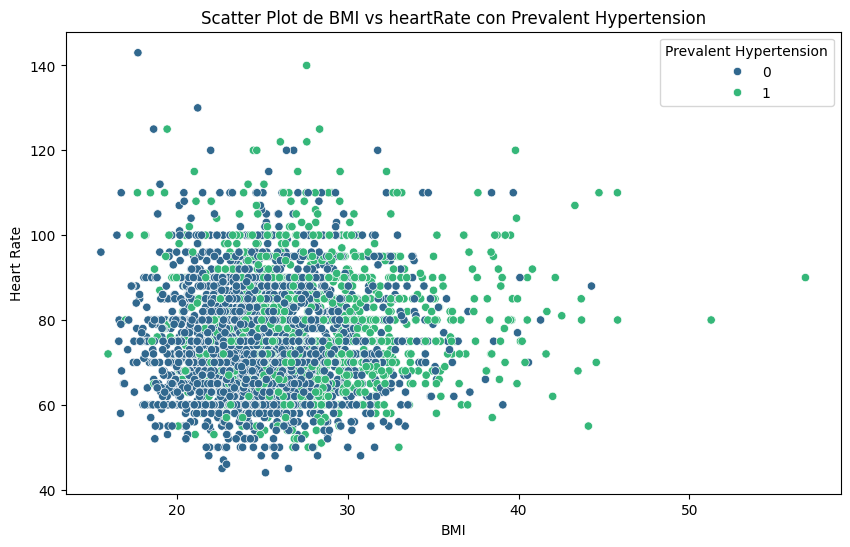

In [135]:
# <CODE>

# <CODE> Realiza un scatter plot de las variables sysBP y diaBP de la base de datos original.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='heartRate', hue='prevalentHyp', palette='viridis')
plt.title('Scatter Plot de BMI vs heartRate con Prevalent Hypertension')
plt.xlabel('BMI')
plt.ylabel('Heart Rate')
plt.legend(title='Prevalent Hypertension')
plt.show()


#### **Ejercicio 4** 

Para intentar separar las clases, debes aplicar PCA a los datos normalizados. Utiliza la función `PCA` de la librería `sklearn.decomposition`.
1. Aplica PCA a los datos normalizados y reduce la dimensionalidad a 9 componentes principales.
2. Visualiza los componentes principales en un scatter plot. Utiliza la variable objetivo (`prevalentHyp`) como color.
3. Responde: ¿Qué relación observas entre los componentes principales y la variable objetivo?

In [136]:
# <CODE> 1. Aplica PCA a los datos normalizados y reduce la dimensionalidad a 4 componentes principales.
from sklearn.decomposition import PCA
n_components = 9
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


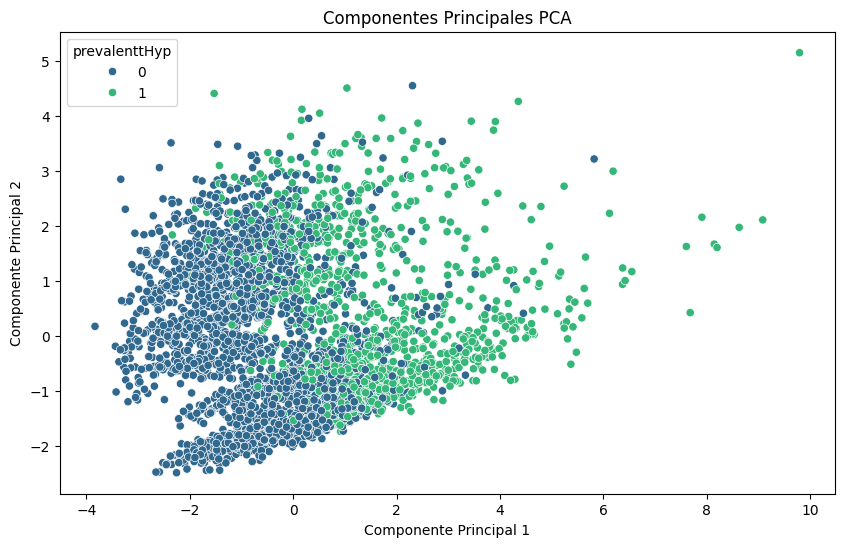

In [137]:
# <CODE> 2. Visualiza los componentes principales en un scatter plot. Utiliza la variable objetivo como color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('Componentes Principales PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='prevalenttHyp')
plt.show()


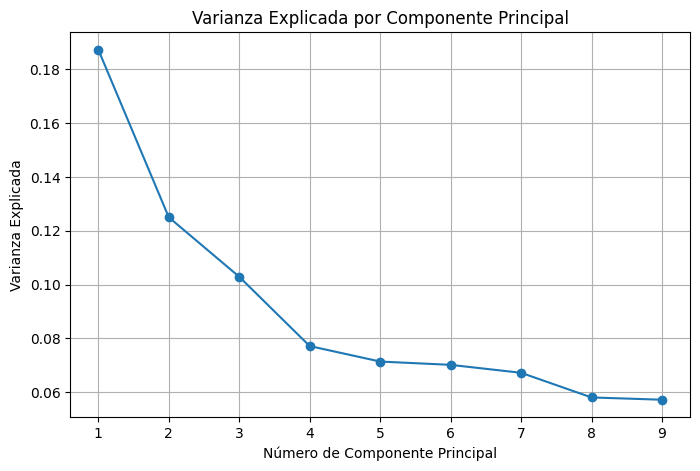

In [138]:
# <CODE> 3. Realiza un plot explicando la varianza explicada por cada componente principal.
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.xticks(range(1, n_components + 1))
plt.grid()